# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
# Importing the training set
Dataset = pd.read_csv('AMZNtrain.csv')
training_set = Dataset.iloc[:, 1:2].values

# Feature Scaling

In [4]:
#  Feature Scaling
from sklearn.preprocessing import MinMaxScaler
MINISC = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = MINISC.fit_transform(training_set)

# Train,Test Creation

In [5]:
#  Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [87]:
X_train.shape

(1198, 60, 1)

# Adding Layers and Training

In [8]:
# - Building the RNN

# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
REG = Sequential()


REG.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
REG.add(Dropout(0.2))


REG.add(LSTM(units = 50, return_sequences = True))
REG.add(Dropout(0.2))


REG.add(LSTM(units = 50, return_sequences = True))
REG.add(Dropout(0.2))


REG.add(LSTM(units = 50))
REG.add(Dropout(0.2))

# Adding the output layer
REG.add(Dense(units = 1))

# Compiling the RNN
REG.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
REG.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0207
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0030
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0034
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0029
Epoch 6/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0028
Epoch 7/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0023
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0023
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0022
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0021
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

In [9]:
# - Making the predictions and visualising the results

Dataset1 = pd.read_csv('AMZNtrain.csv')
real_stock_price = Dataset1.iloc[:, 1:2].values

# Prediction

In [113]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((Dataset['Open'], Dataset1['Open']), axis = 0)#;print(dataset_total)
inputs = dataset_total[len(dataset_total) - len(dataset_total) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = MINISC.transform(inputs);inputs.shape
X_test = np.array(inputs);X_test.shape
X_test = X_test.reshape(1,60,1)
predicted_stock_price = REG.predict(X_test)
predicted_stock_price = MINISC.inverse_transform(predicted_stock_price)

# Prediction Visualizing

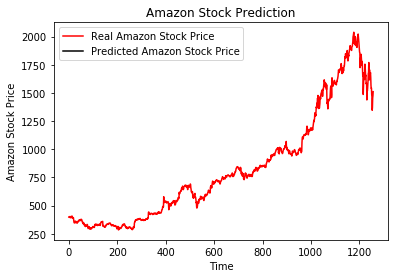

In [114]:
# (4) Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'black', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()